In [1]:
## Illustration in 2D
using StableRNGs
using LinearAlgebra
using Plots
using LaTeXStrings
## Setup
d = 2
n = [400,100]
v = [4,0.04]
F = ones(d,1)/sqrt(d)
## Generate data
rng = StableRNG(0)
YL = [F*randn(rng,nl)' + sqrt(vl)*randn(rng,d,nl) for (nl,vl) in zip(n,v)]
Y1 = YL[2]
Y2 = YL[1]
Y = hcat(Y1,Y2)

2×500 Matrix{Float64}:
 -1.35142  1.04316  0.871362  -0.0538281  …   2.18482   0.985507  -0.977856
 -1.03441  1.0733   0.70977    0.0629322     -1.21482  -1.13037    0.035612

In [2]:
dom = -5:5;

In [3]:
UY = svd(Y).U[:,1];
UY1 = svd(Y1).U[:,1];
slope = UY[2]/UY[1];
slope2 = UY1[2]/UY1[1];

In [4]:
color = palette(:default)

In [5]:
michigan_yellow = RGBA(1.0,0.796,0.020)
michigan_blue = RGBA(0, 0.153, 0.298) #RGBA(0,0.153,0.310)

In [19]:
include("/home/javier/Desktop/alpcah/alpcahFamily.jl")
#U_ALPCAH = ALPCAH_GROUPED(Y, 1, 4; goodpts=100, μ=1, ρ=1.0)
U_ALPCAH = LR_ALPCAH_GROUPED(Y,1; goodpts=100)
slope3 = U_ALPCAH[2]/U_ALPCAH[1];

In [20]:
function ADMM_RPCA(Y, μ, λ)
    L = zeros(size(Y))
    S = zeros(size(Y))
    Λ2 = sign.(Y)
    Λ = deepcopy(Λ2 ./ (max(opnorm(Λ2), (1/λ)*norm(Λ2, Inf))))
    function soft(z, λ)     
        return sign.(z) .* max.(abs.(z) .- λ,0)
    end
    
    function svt(A,λ)
        U, σ, V = svd(A)
        return U*diagm(soft(σ,λ))*V'
    end
    
    normY = norm(Y,2)
    count = 0
    while ((norm(Y-L-S,2)/normY > 1e-7) || (count <100))
        L = svt(Y-S+(1/μ)*Λ, λ/μ)
        S = soft(Y-L+(1/μ)*Λ, 1/μ)
        Λ = Λ + μ*(Y-L-S)
        count = count + 1
    end
    return L
end

ADMM_RPCA (generic function with 1 method)

In [21]:
U_RPCA = svd(ADMM_RPCA(Y, 1, 20)).U[:,1];
slope4 = U_RPCA[2]/U_RPCA[1];

In [72]:
plot(xlabel="Feature 1", ylabel="Feature 2")
plot!(legend_position=:bottomright, legendfontpointsize=10,xtickfontsize=12,ytickfontsize=12,guidefontsize=14,titlefontsize=12, xlim=(-6,6), ylim=(-6,6))

scatter!(Y2[1,:],Y2[2,:], label="ν2 = 4.00", markersize=5, c=michigan_yellow, markeralpha = 0.4, markershape=:uptriangle)
scatter!(Y1[1,:],Y1[2,:], label="ν1 = 0.04", markersize=6, c=color[1],markeralpha = 0.7)

plot!(dom, slope*dom, linewidth=4, label="PCA estimate", c=color[3], linestyle=:dash)
plot!(dom, slope3*dom, linewidth=4, label="LR-ALPCAH estimate", c=color[end-2])
plot!(dom,dom, label="True basis",color=:black,linewidth=4)

#plot!(dom, slope4*dom, linewidth=4, label="RPCA estimate", c=color[4])
savefig("subspace_example.svg")

"/home/javier/Desktop/alpcah/sampta_paper/absolute graphs/subspace_example.svg"

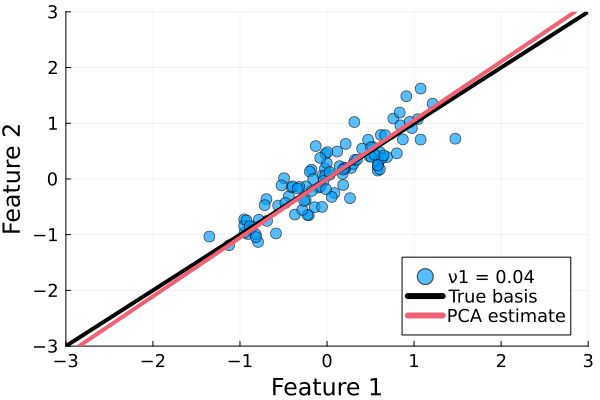

In [10]:
plot(xlabel="Feature 1", ylabel="Feature 2")
plot!(legend_position=:bottomright, legendfontpointsize=12,xtickfontsize=12,ytickfontsize=12,guidefontsize=16,titlefontsize=18, xlim=(-3,3), ylim=(-3,3))
#scatter!(Y2[1,:],Y2[2,:], label="", markersize=5, c=michigan_yellow,markeralpha = 0.66)
scatter!(Y1[1,:],Y1[2,:], label="ν1 = 0.04", markersize=6, c=color[1],markeralpha = 0.66)
plot!(dom,dom, label="True basis",color=:black,linewidth=4)
plot!(dom, slope2*dom, linewidth=4, label="PCA estimate", c=color[end-2])
#savefig("homo_data.pdf")